In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [147]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
df = pd.read_csv("telecom_churn_data.csv")

In [149]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [150]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [151]:
df.shape

(99999, 226)

##### Remove rows with all empty values.

In [152]:
df.dropna(how = 'all', inplace = True)

#shape of new dataframe
df.shape

(99999, 226)

In [153]:
df.isna().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [154]:
# Remove fields with Nan > 60%
df = df.loc[:, df.isna().mean() < .6]

In [155]:
df.isna().sum()

mobile_number              0
circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6             3937
onnet_mou_7             3859
onnet_mou_8             5378
onnet_mou_9             7745
offnet_mou_6            3937
offnet_mou_7            3859
offnet_mou_8            5378
offnet_mou_9            7745
roam_ic_mou_6           3937
roam_ic_mou_7           3859
roam_ic_mou_8           5378
roam_ic_mou_9           7745
roam_og_mou_6           3937
roam_og_mou_7           3859
roam_og_mou_8           5378
roam_og_mou_9           7745
loc_og_t2t_mou_6        3937
loc_og_t2t_mou_7        3859
loc_og_t2t_mou_8        5378
loc_og_t2t_mou_9        7745
loc_og_t2m_mou_6        3937
loc_og_t2m_mou

In [156]:
df.isnull().sum()

mobile_number              0
circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6             3937
onnet_mou_7             3859
onnet_mou_8             5378
onnet_mou_9             7745
offnet_mou_6            3937
offnet_mou_7            3859
offnet_mou_8            5378
offnet_mou_9            7745
roam_ic_mou_6           3937
roam_ic_mou_7           3859
roam_ic_mou_8           5378
roam_ic_mou_9           7745
roam_og_mou_6           3937
roam_og_mou_7           3859
roam_og_mou_8           5378
roam_og_mou_9           7745
loc_og_t2t_mou_6        3937
loc_og_t2t_mou_7        3859
loc_og_t2t_mou_8        5378
loc_og_t2t_mou_9        7745
loc_og_t2m_mou_6        3937
loc_og_t2m_mou

In [157]:
df = df.drop(df[(df['total_rech_num_6'] <= 0) & (df['total_rech_num_7'] <= 0) & (df['total_rech_num_8'] <= 0) & (df['total_rech_num_9'] <= 0)].index)

Remove rows where Recharge Amount was 0 across all months¶

In [158]:
df = df.drop(df[(df['total_rech_amt_6'] <= 0) & (df['total_rech_amt_7'] <= 0) & (df['total_rech_amt_8'] <= 0) & (df['total_rech_amt_9'] <= 0)].index)

VBC charging is associated with POSTPAID, we can remove rows where any column's value is greater than zero¶

In [159]:
df = df.drop(df[(df['jun_vbc_3g'] > 0) | (df['jul_vbc_3g'] > 0) | (df['aug_vbc_3g'] > 0) | (df['sep_vbc_3g'] > 0)].index)

These four columns related to POSTPAID are no longer required

In [160]:
df = df.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g'], axis=1)

In [161]:
df.shape

(76970, 182)

In [162]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76970 entries, 1 to 99998
Data columns (total 182 columns):
mobile_number           int64
circle_id               int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6    object
last_date_of_month_7    object
last_date_of_month_8    object
last_date_of_month_9    object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
ro

#### Filtering High Value customers 

In [163]:
df['rechaverage'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2
p = df.rechaverage.quantile(0.7)

In [164]:
df_highValue = df[(df['rechaverage'] >= p)]

In [165]:
df_highValue.shape

(23095, 183)

##### Add the 2G and 3G data volume consumed

In [166]:
df_highValue['data_volume_6'] = df_highValue['vol_2g_mb_6'] + df_highValue['vol_3g_mb_6']
df_highValue['data_volume_7'] = df_highValue['vol_2g_mb_7'] + df_highValue['vol_3g_mb_7']
df_highValue['data_volume_8'] = df_highValue['vol_2g_mb_8'] + df_highValue['vol_3g_mb_8']
df_highValue['data_volume_9'] = df_highValue['vol_2g_mb_9'] + df_highValue['vol_3g_mb_9']

##### Drop vol_2g_mb_* and vol_3g_mb_*

In [167]:
df_highValue = df_highValue[df_highValue.columns.drop(list(df_highValue.filter(regex='vol_2g_mb_')))]
df_highValue = df_highValue[df_highValue.columns.drop(list(df_highValue.filter(regex='vol_3g_mb_')))]

##### Keep the 'date of last recharge' and 'last day recharge amount' of the action phase

In [168]:
df_highValue['AP_last_recharge_date'] = df_highValue['date_of_last_rech_8'].str.split('/').str[1]
df_highValue['AP_last_recharge_date'] = df_highValue['AP_last_recharge_date'].fillna(0)
df_highValue['AP_last_recharge_date'] = df_highValue['AP_last_recharge_date'].astype(int)
df_highValue['AP_last_recharge_amt'] = df_highValue['last_day_rch_amt_8']

##### Remove all the last date of recharge parameters -

In [169]:
df_highValue = df_highValue[df_highValue.columns.drop(list(df_highValue.filter(regex='date_of_last_rech')))]
df_highValue = df_highValue[df_highValue.columns.drop(list(df_highValue.filter(regex='last_day_rch_amt')))]
df_highValue = df_highValue[df_highValue.columns.drop(list(df_highValue.filter(regex='last_date_of_month')))]

#### Tagging churn

In [170]:
df_highValue = df_highValue.reset_index(drop = True)
for i in range(len(df_highValue)):
    if ((df_highValue.loc[i, "total_ic_mou_9"] == 0 or df_highValue.loc[i, "total_og_mou_9"] == 0) and (df_highValue.loc[i, "data_volume_9"] == 0)): 
        df_highValue.loc[i, "churn"] = 1
    else :
        df_highValue.loc[i, "churn"] = 0

#### Removing churn phase columns

In [171]:
columnNames = df_highValue.columns
for col in columnNames:
    if "_9" in col:        
        df_highValue = df_highValue.drop(col , axis =1)

#### Removing Unique value columns

In [172]:
df_highValue.shape

(23095, 130)

In [173]:
df_highValue.nunique()

mobile_number            23095
circle_id                    1
loc_og_t2o_mou               1
std_og_t2o_mou               1
loc_ic_t2o_mou               1
arpu_6                   22587
arpu_7                   22571
arpu_8                   21794
onnet_mou_6              16293
onnet_mou_7              16429
onnet_mou_8              15183
offnet_mou_6             18502
offnet_mou_7             18605
offnet_mou_8             17616
roam_ic_mou_6             3396
roam_ic_mou_7             2854
roam_ic_mou_8             2850
roam_og_mou_6             4174
roam_og_mou_7             3578
roam_og_mou_8             3510
loc_og_t2t_mou_6          9294
loc_og_t2t_mou_7          9278
loc_og_t2t_mou_8          8863
loc_og_t2m_mou_6         13617
loc_og_t2m_mou_7         13894
loc_og_t2m_mou_8         13115
loc_og_t2f_mou_6          2555
loc_og_t2f_mou_7          2548
loc_og_t2f_mou_8          2464
loc_og_t2c_mou_6          1395
loc_og_t2c_mou_7          1521
loc_og_t2c_mou_8          1488
loc_og_m

In [174]:
#Removing columns only with one unique value
df_highValue = df_highValue.drop(['circle_id',
                                  'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
                                  'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                                  'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'] , axis =1)
                                  

#Removing columns with all unique values
df_highValue = df_highValue.drop(['mobile_number'], axis = 1)

In [175]:
df_highValue.shape

(23095, 119)

#### Data Preparation 
#### 1. Combine Data from month of june and july -Good Phase of customers.
#### 2. Dropping t2t,t2m,t2f,t2c for outgoing and incoming calls since data already included in og_mou columns, but still keep t2t because it might be helpful
                 

In [176]:
df_highValue['onnet_GoodPhase'] = df_highValue['onnet_mou_6'] + df_highValue['onnet_mou_7']
df_highValue['offnet_GoodPhase'] = df_highValue['offnet_mou_6'] + df_highValue['offnet_mou_7']
df_highValue['roam_ic_GoodPhase'] = df_highValue['roam_ic_mou_6'] + df_highValue['roam_ic_mou_7']
df_highValue['roam_og_GoodPhase'] = df_highValue['roam_og_mou_6'] + df_highValue['roam_og_mou_7']

#Dropping Original features

df_highValue = df_highValue.drop(['onnet_mou_6', 'onnet_mou_7',
                                  'offnet_mou_6', 'offnet_mou_7',
                                  'roam_ic_mou_6', 'roam_ic_mou_7',
                                  'roam_og_mou_6', 'roam_og_mou_7'],axis =1)

In [177]:
#Outgoing - Local

df_highValue['loc_og_t2c_GoodPhase'] = df_highValue['loc_og_t2c_mou_6'] + df_highValue ['loc_og_t2c_mou_7']
df_highValue['loc_og_mou_GoodPhase'] = df_highValue['loc_og_mou_6'] + df_highValue ['loc_og_mou_7']

#Dropping columns t2t,t2m,t2f,t2c since already included in loc_og_mou
df_highValue = df_highValue.drop(['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
                                  'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
                                  'loc_og_mou_6'], axis = 1)

df_highValue = df_highValue.drop(['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
                                 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
                                 'loc_og_mou_7'], axis = 1)

In [178]:
# Outgoing - STD

df_highValue['std_og_mou_GoodPhase'] = df_highValue['std_og_mou_6'] + df_highValue['std_og_mou_7']

#Dropping original columns
df_highValue = df_highValue.drop(['std_og_mou_6' ,'std_og_mou_7'] , axis =1)

#Dropping columns t2t,t2m,t2f since already included in std_og_mou
df_highValue = df_highValue.drop(['std_og_t2t_mou_6', 'std_og_t2m_mou_6',
                                  'std_og_t2f_mou_6', 'std_og_t2t_mou_7',
                                  'std_og_t2m_mou_7', 'std_og_t2f_mou_7'], axis =1)

In [179]:
# Outgoing - International, Special and Others

df_highValue['isd_og_mou_GoodPhase'] = df_highValue['isd_og_mou_6'] + df_highValue ['isd_og_mou_7']
df_highValue['spl_og_mou_GoodPhase'] = df_highValue['spl_og_mou_6'] + df_highValue ['spl_og_mou_7']
df_highValue['og_others_GoodPhase'] = df_highValue['og_others_6'] + df_highValue ['og_others_7']
df_highValue['total_og_mou_GoodPhase'] = df_highValue['total_og_mou_6'] + df_highValue ['total_og_mou_7']


#Dropping Original Features isd, spl, og_others, total_og
df_highValue = df_highValue.drop(['isd_og_mou_6', 'isd_og_mou_7',
                                  'spl_og_mou_6', 'spl_og_mou_7',
                                  'og_others_6', 'og_others_7',
                                  'total_og_mou_6', 'total_og_mou_7'], axis =1)

In [180]:
#Incoming - Local

df_highValue['loc_ic_mou_GoodPhase'] = df_highValue['loc_ic_mou_6'] + df_highValue ['loc_ic_mou_7']

#Dropping columns t2t,t2m,t2f since already included in loc_og_mou
df_highValue = df_highValue.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
                                  'loc_ic_t2f_mou_6', 'loc_ic_t2t_mou_7',
                                  'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7',
                                  'loc_ic_mou_6', 'loc_ic_mou_7'], axis =1)

In [181]:
#Incoming - STD

df['std_ic_mou_GoodPhase'] = df['std_ic_mou_6'] + df ['std_ic_mou_7']

#Dropping original columns
df_highValue = df_highValue.drop(['std_ic_mou_6', 'std_ic_mou_7'], axis =1)

#Dropping columns t2t,t2m,t2f since already included in std_og_mou
df_highValue = df_highValue.drop(['std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
                                  'std_ic_t2f_mou_6', 'std_ic_t2t_mou_7',
                                  'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7'], axis =1)

In [182]:
# Incoming - ISD, Special and Others

df_highValue['isd_ic_mou_GoodPhase'] = df_highValue['isd_ic_mou_6'] + df_highValue ['isd_ic_mou_7']
df_highValue['spl_ic_mou_GoodPhase'] = df_highValue['spl_ic_mou_6'] + df_highValue ['spl_ic_mou_7']
df_highValue['ic_others_GoodPhase'] = df_highValue['ic_others_6'] + df_highValue ['ic_others_7']
df_highValue['total_ic_mou_GoodPhase'] = df_highValue['total_ic_mou_6'] + df_highValue ['total_ic_mou_7']


#Dropping Original Features isd, spl, og_others, total_og
df_highValue = df_highValue.drop(['isd_ic_mou_6', 'isd_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7',
                                  'ic_others_6', 'ic_others_7', 'total_ic_mou_6', 'total_ic_mou_7'] , axis =1)

In [183]:
df_highValue.shape

(23095, 77)

In [184]:
df_highValue.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23095 entries, 0 to 23094
Data columns (total 77 columns):
arpu_6                    23095 non-null float64
arpu_7                    23095 non-null float64
arpu_8                    23095 non-null float64
onnet_mou_8               22373 non-null float64
offnet_mou_8              22373 non-null float64
roam_ic_mou_8             22373 non-null float64
roam_og_mou_8             22373 non-null float64
loc_og_t2t_mou_8          22373 non-null float64
loc_og_t2m_mou_8          22373 non-null float64
loc_og_t2f_mou_8          22373 non-null float64
loc_og_t2c_mou_8          22373 non-null float64
loc_og_mou_8              22373 non-null float64
std_og_t2t_mou_8          22373 non-null float64
std_og_t2m_mou_8          22373 non-null float64
std_og_t2f_mou_8          22373 non-null float64
std_og_mou_8              22373 non-null float64
isd_og_mou_8              22373 non-null float64
spl_og_mou_8              22373 non-null float64
og_others

In [185]:
#Recharge Amount
df_highValue['total_rech_num_GoodPhase'] = df_highValue['total_rech_num_6'] + df_highValue['total_rech_num_7']
df_highValue['total_rech_amt_GoodPhase'] = df_highValue['total_rech_amt_6'] + df_highValue['total_rech_amt_7']

#Dropping 6 and 7 month columns
df_highValue = df_highValue.drop(['total_rech_num_6', 'total_rech_num_7',
                                  'total_rech_amt_6', 'total_rech_amt_7'], axis = 1)

In [186]:
df_highValue['data_volume_goodPhase'] = df_highValue['data_volume_6'] + df_highValue['data_volume_7'] 
df_highValue = df_highValue.drop(['data_volume_6', 'data_volume_7'], axis = 1)

In [187]:
df_highValue['arpu_goodPhase'] = df_highValue['arpu_6'] + df_highValue['arpu_7'] 
df_highValue = df_highValue.drop(['arpu_6', 'arpu_7'], axis = 1)

In [188]:
df_highValue['max_rech_amt_goodPhase'] = df_highValue['max_rech_amt_6'] + df_highValue['max_rech_amt_7'] 
df_highValue = df_highValue.drop(['max_rech_amt_6', 'max_rech_amt_7'], axis = 1)

In [189]:
df_highValue.shape

(23095, 72)

#### Drop columns with NULL values more than 60 percent

In [190]:
df_highValue = df_highValue.loc[:, df_highValue.isnull().mean() < .6]

##### A few more attributes need to be taken care of

In [191]:
# Add all the monthly and sachets of 2G and 3G packs
df_highValue['data_packs_6'] = df_highValue['monthly_2g_6'] + df_highValue['sachet_2g_6'] + df_highValue['monthly_3g_6'] + df_highValue['sachet_3g_6']
df_highValue['data_packs_7'] = df_highValue['monthly_2g_7'] + df_highValue['sachet_2g_7'] + df_highValue['monthly_3g_7'] + df_highValue['sachet_3g_7']
df_highValue['data_packs_8'] = df_highValue['monthly_2g_8'] + df_highValue['sachet_2g_8'] + df_highValue['monthly_3g_8'] + df_highValue['sachet_3g_8']


# Drop the individual fields
df_highValue = df_highValue[df_highValue.columns.drop(list(df_highValue.filter(regex='monthly_')))]
df_highValue = df_highValue[df_highValue.columns.drop(list(df_highValue.filter(regex='sachet_')))]


# Combine months 6 and 7 as GoodPhase
df_highValue['data_packs_goodPhase'] = df_highValue['data_packs_6'] + df_highValue['data_packs_7'] 


# Drop months 6 and 7 now
df_highValue = df_highValue.drop(['data_packs_6', 'data_packs_7'], axis = 1)

In [192]:
df_highValue.describe(percentiles=[.25, .5, .75, .90, .95, .96,.97, .98,.991 ,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999])

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,aon,rechaverage,data_volume_8,AP_last_recharge_date,AP_last_recharge_amt,churn,onnet_GoodPhase,offnet_GoodPhase,roam_ic_GoodPhase,roam_og_GoodPhase,loc_og_t2c_GoodPhase,loc_og_mou_GoodPhase,std_og_mou_GoodPhase,isd_og_mou_GoodPhase,spl_og_mou_GoodPhase,og_others_GoodPhase,total_og_mou_GoodPhase,loc_ic_mou_GoodPhase,isd_ic_mou_GoodPhase,spl_ic_mou_GoodPhase,ic_others_GoodPhase,total_ic_mou_GoodPhase,total_rech_num_GoodPhase,total_rech_amt_GoodPhase,data_volume_goodPhase,arpu_goodPhase,max_rech_amt_goodPhase,data_packs_8,data_packs_goodPhase
count,23095.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,23095.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,22373.000000,23095.000000,22373.000000,22373.000000,22373.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000,22765.000000,23095.000000,22765.000000,22765.000000,22765.000000,22765.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000,23095.000000
mean,470.490921,296.973675,391.250081,11.637602,21.082484,81.026294,157.722191,5.359528,1.717790,244.116190,207.542933,208.018673,1.561062,417.126917,1.671071,6.907956,0.045075,648.934097,60.058521,139.886912,12.052002,212.006843,14.045038,28.571535,2.209432,44.829747,259.862799,0.034012,10.198701,1.171743,10.494349,540.695995,132.738731,1221.914484,629.058151,96.030325,26.334791,80.034683,0.110370,654.494540,867.647834,27.336535,49.793014,3.309685,520.814488,939.046125,3.637458,13.179164,0.770807,1468.509761,438.304103,19.475035,0.091906,2.529058,552.097350,24.458065,1258.116302,200.419063,1056.382871,284.725352,0.609136,1.076250
std,445.195788,482.361046,485.596903,63.413767,105.883116,230.128537,225.118377,18.806674,7.714337,355.212305,431.859040,435.511085,10.661974,637.433946,32.749254,23.475596,2.894974,691.732167,146.530048,196.073752,39.243346,281.466676,61.728642,101.547856,20.359081,130.834804,328.486674,0.125432,65.700196,13.775097,9.715105,555.852364,144.826771,951.153463,464.216728,471.488524,6.913705,124.107695,0.313357,884.479132,887.088700,124.180725,183.542717,14.225585,671.245316,1172.902148,65.773795,37.184657,2.584228,1205.269503,546.761309,115.838111,0.252284,29.056660,631.754897,17.784415,928.433455,890.338638,765.270297,262.658977,1.781260,3.143908
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,335.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,671.000000,0.000000,-1499.566000,18.000000,0.000000,0.000000
25%,256.077500,35.810000,108.940000,0.000000,0.000000,5.830000,21.590000,0.000000,0.000000,35.890000,0.000000,1.390000,0.000000,6.660000,0.000000,0.000000,0.000000,214.460000,6.760000,28.530000,0.000000,47.190000,0.000000,0.330000,0.000000,2.230000,66.775000,0.000000,0.000000,0.000000

In [193]:
columnNames = df_highValue.columns

for col in columnNames:
    q = df_highValue[col].quantile(0.99)
    df_highValue = df_highValue.drop(df_highValue[df_highValue[col] > q].index)

In [194]:
df_highValue.describe(percentiles=[.25, .5, .75, .90, .95, .96,.97, .98,.991 ,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999])

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,aon,rechaverage,data_volume_8,AP_last_recharge_date,AP_last_recharge_amt,churn,onnet_GoodPhase,offnet_GoodPhase,roam_ic_GoodPhase,roam_og_GoodPhase,loc_og_t2c_GoodPhase,loc_og_mou_GoodPhase,std_og_mou_GoodPhase,isd_og_mou_GoodPhase,spl_og_mou_GoodPhase,og_others_GoodPhase,total_og_mou_GoodPhase,loc_ic_mou_GoodPhase,isd_ic_mou_GoodPhase,spl_ic_mou_GoodPhase,ic_others_GoodPhase,total_ic_mou_GoodPhase,total_rech_num_GoodPhase,total_rech_amt_GoodPhase,data_volume_goodPhase,arpu_goodPhase,max_rech_amt_goodPhase,data_packs_8,data_packs_goodPhase
count,12987.000000,12514.00000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000,12514.0,12987.000000,12514.000000,12514.000000,12514.000000,12514.00000,12514.000000,12514.000000,12514.000000,12514.000000,12987.000000,12514.000000,12514.000000,12514.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12810.000000,12987.000000,12810.000000,12810.000000,12810.000000,12810.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,352.277644,215.98145,284.033313,4.904206,9.438619,52.127325,121.376951,3.267322,0.906951,176.779493,159.963705,150.799763,0.557995,311.325558,0.056325,3.909338,0.0,474.156895,39.996227,104.063650,7.175337,151.24435,7.595645,15.993901,0.767058,24.359981,171.819207,0.026585,2.363952,0.311549,8.985832,402.427889,106.514130,1201.794487,499.526719,42.554772,26.196119,62.426426,0.119350,511.375879,673.624342,12.167950,25.078703,1.862062,393.250913,761.036211,0.152979,7.845871,0.511820,1158.936607,322.919831,4.477932,0.080000,0.719619,386.780899,21.587588,999.053438,96.274777,842.602817,232.801648,0.433587,0.704320
std,200.744653,275.91082,261.475315,19.285479,32.285468,80.187134,138.347711,8.394479,2.898371,185.598908,273.911749,245.682203,2.752147,372.067001,0.542614,7.501215,0.0,371.572836,52.779218,105.462626,15.684535,140.69527,17.415934,26.944670,2.935826,35.074814,149.651020,0.099717,10.127388,1.174792,7.065824,248.210784,69.148486,929.350056,136.744682,173.349943,6.925076,64.861973,0.324213,539.372608,499.596748,36.061063,63.697348,4.579892,370.009173,714.124642,0.983247,12.709408,1.332074,604.427113,271.903181,15.751533,0.172908,2.148579,285.676977,12.537426,273.489365,339.377270,240.114716,120.007502,1.138339,1.753757
min,-39.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,335.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,671.000000,0.000000,-42.152000,30.000000,0.000000,0.000000
25%,220.910500,31.36500,92.345000,0.000000,0.000000,5.030000,18.682500,0.000000,0.000000,31.660000,0.000000,1.280000,0.000000,6.010000,0.000000,0.000000,0.0,192.090000,5.980000,25.380000,0.000000,41.56500,0.000000,0.160000,0.000000,1.630000,54.930000,0.000000,0.000000,0.000000,4.000000,237.000000,50.000000,480.000000,389.500000,0.000000,25.000000

In [195]:
df_highValue.shape

(12987, 62)

##### Exploratory Data Analysis

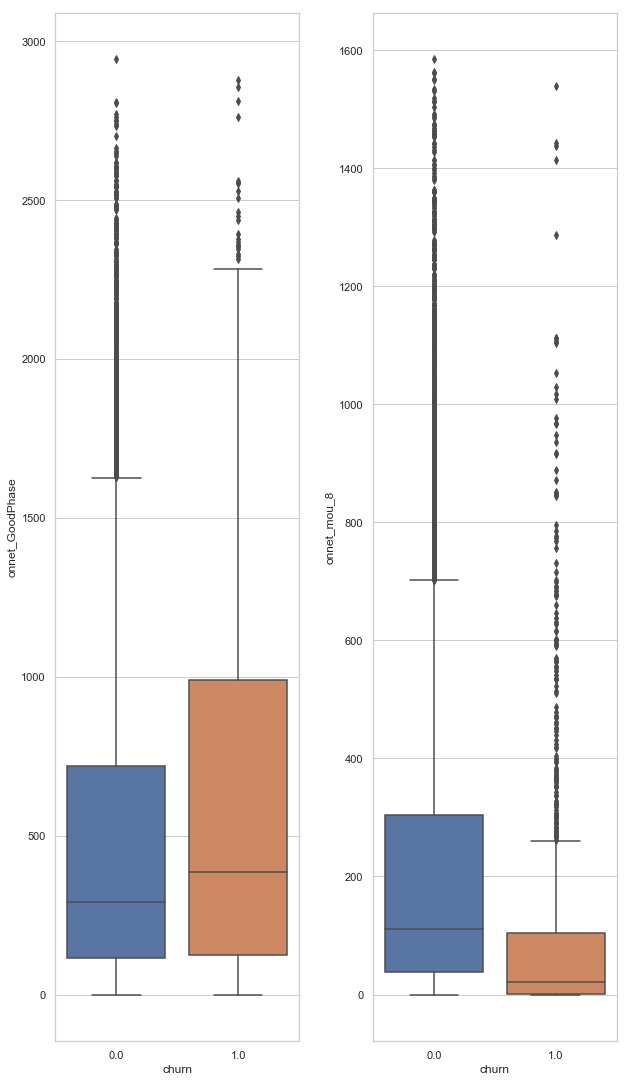

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
f, axes = plt.subplots(1, 2, figsize=(6, 15), sharex=True)
f.tight_layout()
plt.subplots_adjust(left=0, bottom=None, right=1.3, top=None, wspace=None, hspace=None)
sns.boxplot(x="churn", y ="onnet_GoodPhase",data =df_highValue,ax=axes[0])
sns.boxplot(x="churn", y ="onnet_mou_8",data =df_highValue,ax=axes[1])


##### Inference : The onnet is reduced during Action Phase

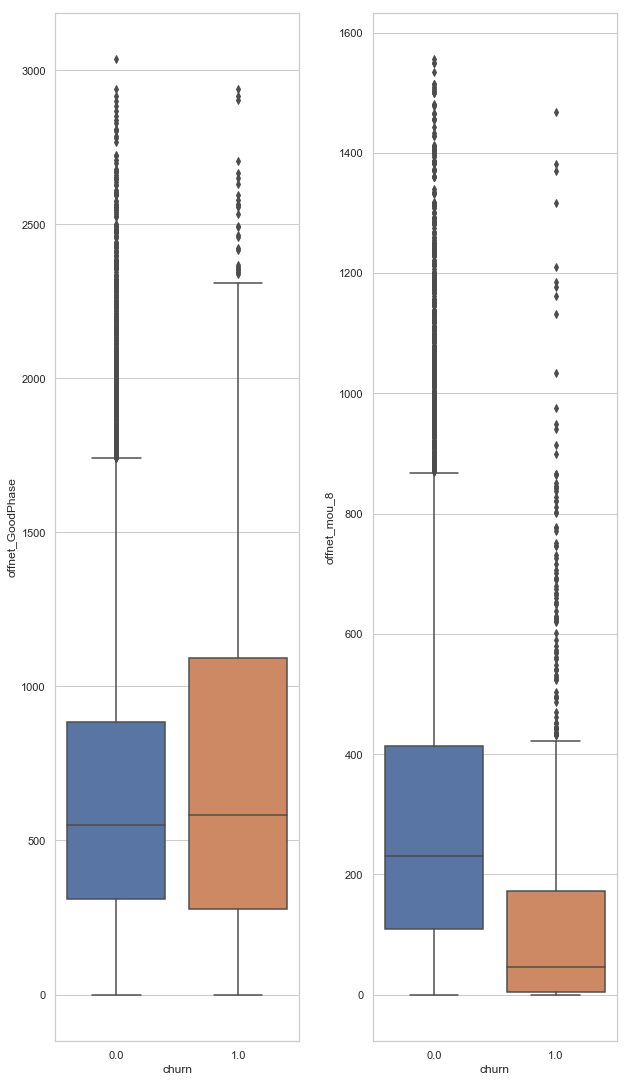

In [197]:
f, axes = plt.subplots(1, 2, figsize=(6, 15), sharex=True)
f.tight_layout()
plt.subplots_adjust(left=0, bottom=None, right=1.3, top=None, wspace=None, hspace=None)
sns.boxplot(x="churn", y ="offnet_GoodPhase",data =df_highValue,ax=axes[0])
sns.boxplot(x="churn", y ="offnet_mou_8",data =df_highValue,ax=axes[1])

##### Inference : The offnet is reduced during Action Phase

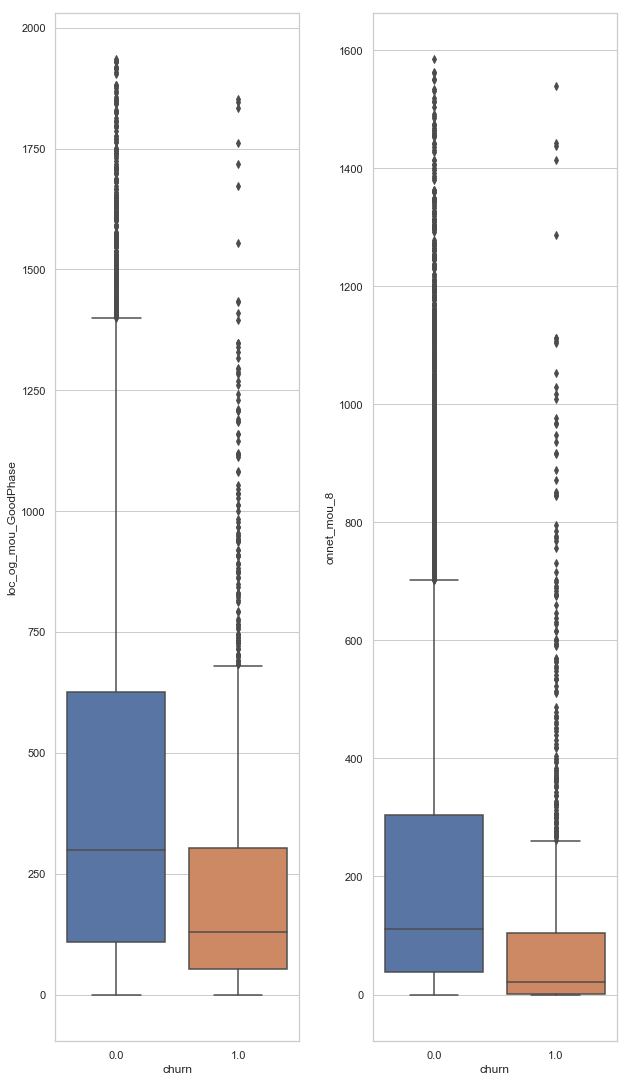

In [198]:
f, axes = plt.subplots(1, 2, figsize=(6, 15), sharex=True)
f.tight_layout()
plt.subplots_adjust(left=0, bottom=None, right=1.3, top=None, wspace=None, hspace=None)
sns.boxplot(x="churn", y ="loc_og_mou_GoodPhase",data =df_highValue,ax=axes[0])
sns.boxplot(x="churn", y ="onnet_mou_8",data =df_highValue,ax=axes[1])


##### Inference : Outgoing local calls has been decreased during action phase

Percentage of NaN Values

In [199]:
for column in df_highValue:
    null_entries = 100 * (df_highValue[column].isna().sum()/len(df_highValue[column]))
    print(column, null_entries)

arpu_8 0.0
onnet_mou_8 3.642103642103642
offnet_mou_8 3.642103642103642
roam_ic_mou_8 3.642103642103642
roam_og_mou_8 3.642103642103642
loc_og_t2t_mou_8 3.642103642103642
loc_og_t2m_mou_8 3.642103642103642
loc_og_t2f_mou_8 3.642103642103642
loc_og_t2c_mou_8 3.642103642103642
loc_og_mou_8 3.642103642103642
std_og_t2t_mou_8 3.642103642103642
std_og_t2m_mou_8 3.642103642103642
std_og_t2f_mou_8 3.642103642103642
std_og_mou_8 3.642103642103642
isd_og_mou_8 3.642103642103642
spl_og_mou_8 3.642103642103642
og_others_8 3.642103642103642
total_og_mou_8 0.0
loc_ic_t2t_mou_8 3.642103642103642
loc_ic_t2m_mou_8 3.642103642103642
loc_ic_t2f_mou_8 3.642103642103642
loc_ic_mou_8 3.642103642103642
std_ic_t2t_mou_8 3.642103642103642
std_ic_t2m_mou_8 3.642103642103642
std_ic_t2f_mou_8 3.642103642103642
std_ic_mou_8 3.642103642103642
total_ic_mou_8 0.0
spl_ic_mou_8 3.642103642103642
isd_ic_mou_8 3.642103642103642
ic_others_8 3.642103642103642
total_rech_num_8 0.0
total_rech_amt_8 0.0
max_rech_amt_8 0.0
ao

In [200]:
df_highValue.fillna(df_highValue.median(), inplace=True)

In [201]:
df_highValue['churn'].value_counts()

0.0    11437
1.0     1550
Name: churn, dtype: int64

In [202]:
# Calculate churn rate
churn = (sum(df_highValue['churn'])/len(df_highValue['churn'].index))*100
churn

11.935011935011936

In [203]:
df_highValue.shape

(12987, 62)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X = df_highValue.drop(['churn'], axis =1)
y = df_highValue['churn']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train.value_counts()
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [207]:
#Logistic Regression using RFE [ without PCA]

In [208]:
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)
print(type(X_train))
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
(3897, 61)


In [209]:
#Running Recursive Feature selection with 10 variables and getting the results

In [210]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)         # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False  True False False False False False False False  True  True
 False  True False False False  True  True False False False False False
 False False  True  True False False False False False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False]
[23 36  1 50 16 15  3  8 46 14  1  1 17  1 35 33 52  1  1 39 40 10 48 22
 43  7  1  1 20 34  9 18 37  2 41  1  4  1 29 30 31 44 38 11  5 28 32 49
 12  6 47 42 27 21 51 45 24 19 13 25 26]


In [211]:
col = X_train.columns[rfe.support_]

In [212]:
#Fitting logistic regression model using statsmodels library

In [213]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 9090
Model:                            GLM   Df Residuals:                     9079
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2049.2
Date:                Mon, 07 Oct 2019   Deviance:                       4098.4
Time:                        14:24:35   Pearson chi2:                 3.10e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.4836      0.086    -40.376      0.000      -3.653      -3.315
offnet_mou_8             1.5976      0.312      5.123      0.000       0.986       2.209
std_og_t2t_mou_8         1.7162      1.147      1.496      0.135      -0.532       3.964
std_og_t2m_mou_8         0.1259      0.789      0.160      0.873      -1.420       1.672
std_og_mou_8             0.5335      1.225      0.436      0.663      -1.867       2.934
total_og_mou_8          -3.6070      0.414     -8.705      0.000      -4.419      -2.795
loc_ic_t2t_mou_8         0.4352      0.104      4.177      0.000       0.231       0.639
total_ic_mou_8          -1.2595      0.132     -9.517      0.000      -1.519      -1.000
spl_ic_mou_8            -0.3973      0.083     -4.769      0.000      -0.561      -0.234
data_volume_8           -0.5943      0.126     -4.723      0.000      -0.841      -0.348
AP_last_recharge_amt    -0.7464      0.072    -10.396      0.000      -0.887      -0.606
========================================================================================
"""

In [214]:
#Check VIF 

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [216]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_mou_8,728.09
2,std_og_t2t_mou_8,492.54
3,std_og_t2m_mou_8,299.38
5,total_og_mou_8,29.82
1,offnet_mou_8,23.02
7,total_ic_mou_8,2.63
6,loc_ic_t2t_mou_8,2.21
10,AP_last_recharge_amt,1.15
8,spl_ic_mou_8,1.02
9,data_volume_8,1.02


In [217]:
#Removing feature std_og_mou_8 since it has High VIF and High P value

In [218]:
X_train_sm = X_train_sm.drop(['std_og_mou_8'] , axis =1)
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 9090
Model:                            GLM   Df Residuals:                     9080
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2049.3
Date:                Mon, 07 Oct 2019   Deviance:                       4098.6
Time:                        14:24:35   Pearson chi2:                 3.24e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.4938      0.083    -41.939      0.000      -3.657      -3.330
offnet_mou_8             1.7094      0.177      9.652      0.000       1.362       2.056
std_og_t2t_mou_8         2.2078      0.210     10.503      0.000       1.796       2.620
std_og_t2m_mou_8         0.4618      0.167      2.772      0.006       0.135       0.788
total_og_mou_8          -3.7423      0.276    -13.569      0.000      -4.283      -3.202
loc_ic_t2t_mou_8         0.4501      0.098      4.598      0.000       0.258       0.642
total_ic_mou_8          -1.2670      0.131     -9.641      0.000      -1.525      -1.009
spl_ic_mou_8            -0.3971      0.083     -4.765      0.000      -0.560      -0.234
data_volume_8           -0.5939      0.126     -4.719      0.000      -0.841      -0.347
AP_last_recharge_amt    -0.7516      0.071    -10.591      0.000      -0.891      -0.612
========================================================================================
"""

In [219]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,20.85
1,offnet_mou_8,15.54
2,std_og_t2t_mou_8,12.07
3,std_og_t2m_mou_8,5.22
6,total_ic_mou_8,2.49
5,loc_ic_t2t_mou_8,1.99
9,AP_last_recharge_amt,1.14
7,spl_ic_mou_8,1.02
8,data_volume_8,1.02
0,const,1.00


In [220]:
#Removing total_og_mou_8 since High VIF

In [221]:
X_train_sm = X_train_sm.drop(['total_og_mou_8'] , axis =1)
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 9090
Model:                            GLM   Df Residuals:                     9081
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2172.8
Date:                Mon, 07 Oct 2019   Deviance:                       4345.6
Time:                        14:24:36   Pearson chi2:                 4.32e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.6253      0.086    -41.993      0.000      -3.795      -3.456
offnet_mou_8             0.1211      0.104      1.167      0.243      -0.082       0.324
std_og_t2t_mou_8        -0.5160      0.061     -8.435      0.000      -0.636      -0.396
std_og_t2m_mou_8        -0.4579      0.106     -4.339      0.000      -0.665      -0.251
loc_ic_t2t_mou_8         0.6706      0.096      6.990      0.000       0.483       0.859
total_ic_mou_8          -2.4184      0.124    -19.497      0.000      -2.662      -2.175
spl_ic_mou_8            -0.4242      0.085     -5.006      0.000      -0.590      -0.258
data_volume_8           -0.6345      0.131     -4.832      0.000      -0.892      -0.377
AP_last_recharge_amt    -0.9293      0.071    -13.061      0.000      -1.069      -0.790
========================================================================================
"""

In [222]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,5.57
3,std_og_t2m_mou_8,5.22
5,total_ic_mou_8,2.41
4,loc_ic_t2t_mou_8,1.84
8,AP_last_recharge_amt,1.12
2,std_og_t2t_mou_8,1.08
6,spl_ic_mou_8,1.02
7,data_volume_8,1.02
0,const,1.00


In [223]:
#Removing offnet_mou_8 since it has high P value

In [224]:
X_train_sm = X_train_sm.drop(['offnet_mou_8'] , axis =1)
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 9090
Model:                            GLM   Df Residuals:                     9082
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2173.4
Date:                Mon, 07 Oct 2019   Deviance:                       4346.9
Time:                        14:24:36   Pearson chi2:                 4.25e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.6288      0.087    -41.939      0.000      -3.798      -3.459
std_og_t2t_mou_8        -0.5284      0.060     -8.749      0.000      -0.647      -0.410
std_og_t2m_mou_8        -0.3508      0.052     -6.693      0.000      -0.454      -0.248
loc_ic_t2t_mou_8         0.6732      0.095      7.071      0.000       0.487       0.860
total_ic_mou_8          -2.3910      0.122    -19.636      0.000      -2.630      -2.152
spl_ic_mou_8            -0.4272      0.085     -5.039      0.000      -0.593      -0.261
data_volume_8           -0.6383      0.131     -4.857      0.000      -0.896      -0.381
AP_last_recharge_amt    -0.9196      0.071    -13.024      0.000      -1.058      -0.781
========================================================================================
"""

In [225]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_ic_mou_8,1.89
3,loc_ic_t2t_mou_8,1.81
7,AP_last_recharge_amt,1.09
2,std_og_t2m_mou_8,1.03
1,std_og_t2t_mou_8,1.02
5,spl_ic_mou_8,1.02
6,data_volume_8,1.02
0,const,1.00


In [226]:
#All features have good VIF and p value, no need to drop any more columns

In [227]:
finalColumns = X_train_sm.columns
print(finalColumns)
X_test_sm = X_test[['std_og_t2t_mou_8' ,'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8' ,'total_ic_mou_8','spl_ic_mou_8' ,'data_volume_8' ,'AP_last_recharge_amt']]


Index(['const', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'data_volume_8',
       'AP_last_recharge_amt'],
      dtype='object')


In [228]:
#Handling Class Imbalance using SMOTE

In [229]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

smote = SMOTE(random_state=2)
X_train_sm, y_train_smote = smote.fit_sample(X_train_sm, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling, counts of label '1': 1076
Before OverSampling, counts of label '0': 8014 

After OverSampling, counts of label '1': 8014
After OverSampling, counts of label '0': 8014


In [230]:
#Predicting Training Data

In [231]:
y_train_pred_prob = res.predict(X_train_sm)

In [232]:
from sklearn.metrics import recall_score,precision_recall_curve,roc_curve,auc,accuracy_score,precision_score
precision,recall,thresholds = precision_recall_curve(y_train_smote,y_train_pred_prob)

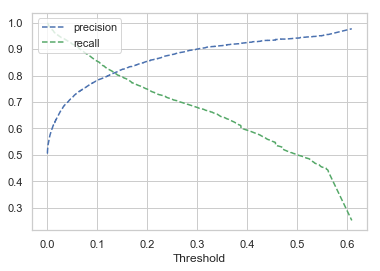

In [233]:
plt.plot(thresholds, precision[:-1], 'b--', label='precision')
plt.plot(thresholds, recall[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.show()

### Choosing Probability of 0.4 to have a have high Recall value . [Recall metric is most important for telecom churn]

In [234]:
#Training Recall and Accuracy

In [235]:

y_pred_train = (y_train_pred_prob >= 0.4).astype(bool) # set threshold as 0.65
print(recall_score(y_pred_train ,y_train_smote ))
print(accuracy_score(y_pred_train ,y_train_smote))
print(precision_score(y_pred_train ,y_train_smote))

0.9250827009145748
0.7725854754180185
0.5932118792113801


In [236]:
#Test recall and accuracy

In [237]:
X_test_sm = sm.add_constant(X_test_sm)
y_pred_test = (res.predict(X_test_sm) >= 0.4).astype(bool) # set threshold as 0.65
print(recall_score(y_pred_test ,y_test ))
print(accuracy_score(y_pred_test ,y_test))
print(precision_score(y_pred_test ,y_test))

0.6666666666666666
0.9160892994611239
0.620253164556962


### Results of Logistic Regression using RFE 

Test Accuracy - 0.91
Test Recall - 0.65

Important factors for Churn are :
std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8','total_ic_mou_8','spl_ic_mou_8','data_volume_8','AP_last_recharge_amt'


All the features are from month 8 -Action phase



In [238]:
#Dimensionlaity Reduciton using PCA

In [239]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
print(X_test.shape)

(3897, 61)


In [240]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

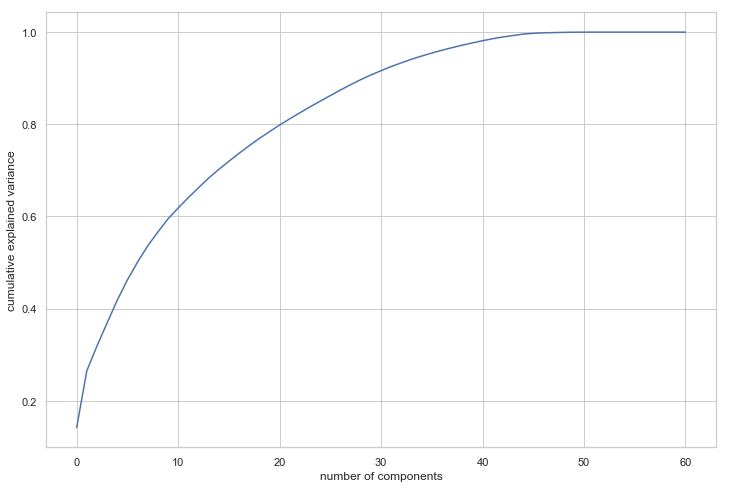

In [241]:
import matplotlib.pyplot as plt
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [242]:
# We see that around 37 attributes explain 95% of the variance
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 37)

In [243]:
df_train_pca = pca_final.fit_transform(X_train)

In [244]:
df_train_pca = pd.DataFrame(df_train_pca)

In [245]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
df_train_pca, y_train = sm.fit_sample(df_train_pca, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1076
Before OverSampling, counts of label '0': 8014 

After OverSampling, counts of label '1': 8014
After OverSampling, counts of label '0': 8014


In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [247]:
learner_pca = LogisticRegression(class_weight = "balanced")  ##To handle Class Imbalance
model_pca = learner_pca.fit(df_train_pca,y_train)

In [248]:
df_test_pca = pca_final.transform(X_test)

In [249]:
#Making prediction on the train data
pred_train = model_pca.predict(df_train_pca)
pred_train_probability = model_pca.predict_proba(df_train_pca)[:,1]
prob_list = pred_train_probability.tolist()

In [250]:
#Training Data Metrics

In [251]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, pred_train)

array([[6807, 1207],
       [1004, 7010]], dtype=int64)

In [252]:
from sklearn import metrics
metrics.accuracy_score(y_train, pred_train)

0.8620539056650861

In [253]:
recall_score(y_train,pred_train)

0.8747192413276765

In [254]:
precision,recall,thresholds = precision_recall_curve(y_train,pred_train_probability)

##### Precision vs Recall

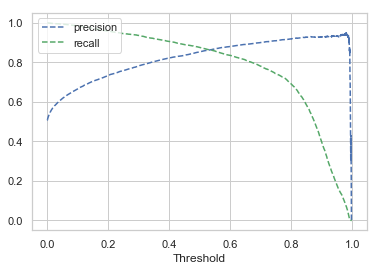

In [255]:
plt.plot(thresholds, precision[:-1], 'b--', label='precision')
plt.plot(thresholds, recall[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.show()

##### Since Recall has to be high [we do not want to miss potential churn customers] , we can select the threshold to be around 0.5

In [256]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train)
roc_auc = auc(fpr, tpr)

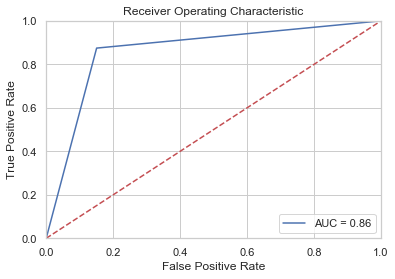

In [257]:
plt.figure()
lw = 2
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [258]:
numbers =  [float(x)/20 for x in range(20)]

In [259]:
y_pred_final = []
for i in numbers:
    temp = []
    for item in prob_list:
        if item > i:
            temp.append(1)
        else :
            temp.append(0)           
   
    y_pred_final.append(temp)

In [260]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
j=0
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train, y_pred_final[j] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    j=j+1
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.05  0.05  0.688358  0.993012  0.383704
0.10  0.10  0.744510  0.983654  0.505366
0.15  0.15  0.781632  0.971425  0.591839
0.20  0.20  0.804592  0.958198  0.650986
0.25  0.25  0.821500  0.944722  0.698278
0.30  0.30  0.837285  0.935737  0.738832
0.35  0.35  0.847392  0.919765  0.775019
0.40  0.40  0.854068  0.905041  0.803095
0.45  0.45  0.857000  0.888944  0.825056
0.50  0.50  0.862054  0.874719  0.849389
0.55  0.55  0.863364  0.856751  0.869978
0.60  0.60  0.860557  0.834914  0.886199
0.65  0.65  0.855815  0.811205  0.900424
0.70  0.70  0.846394  0.779511  0.913277
0.75  0.75  0.833417  0.740953  0.925880
0.80  0.80  0.814013  0.689294  0.938732
0.85  0.85  0.768281  0.582605  0.953956
0.90  0.90  0.681370  0.393187  0.969553
0.95  0.95  0.580858  0.174445  0.987272


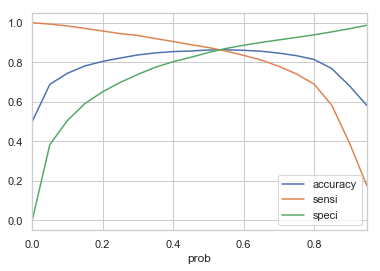

In [261]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### We have a balance in accuracy,sensitivity, specificity at threshold of 0.5, hence we choose 0.5 as the threshold¶


In [262]:
#Test Data metrics

In [263]:
#Making prediction on the test data with cutoff of 0.5
y_pred_test = (model_pca.predict_proba(df_test_pca)[:,1] >= 0.5).astype(bool) # set threshold as 0.5
recall_score(y_pred_test ,y_test )

0.45210280373831774

#### Results of Logistic Regression model with PCA:
Since Recall is not so high, this model will is not useful

##### Support Vector Machine - model

In [264]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [265]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1,kernel='rbf',class_weight = 'balanced')

In [266]:
cv_results = cross_val_score(model, df_train_pca, y_train, cv = folds, scoring = 'recall')

In [267]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean ReCall = {}".format(cv_results.mean()))

[0.96492308 0.95886889 0.96321696 0.95540623 0.95163317]
mean ReCall = 0.9588096651739904


In [268]:
#Use GridSearchCV to Tune Hyperparameters

In [269]:
hyper_params = [ {'gamma': [1e-2,1e-3,1e-4],
                     'C': [1,100,1000]}]
from sklearn.metrics import make_scorer,precision_score,recall_score,accuracy_score

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

model = SVC(kernel="rbf")

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = hyper_params, 
                        scoring= scorers, 
                        cv = folds, 
                        refit ="recall_score", ###### recall_score is important for this case study
                        verbose = 1,
                       return_train_score=True)  

In [270]:
model_cv.fit(df_train_pca, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 21.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit='recall_score',
             return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=1)

In [271]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['mean_test_precision_score', 'mean_test_recall_score','mean_test_accuracy_score','param_C' ,'param_gamma']]

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_C,param_gamma
0,0.885200,0.914803,0.898053,1,0.01
1,0.859568,0.868132,0.863177,1,0.001
2,0.850519,0.855171,0.852446,1,0.0001
3,0.910189,0.986864,0.944784,100,0.01
4,0.881737,0.923674,0.899863,100,0.001
5,0.860434,0.876613,0.867232,100,0.0001
6,0.912298,0.990620,0.947716,1000,0.01
7,0.885104,0.949870,0.913277,1000,0.001
8,0.872458,0.891520,0.880646,1000,0.0001


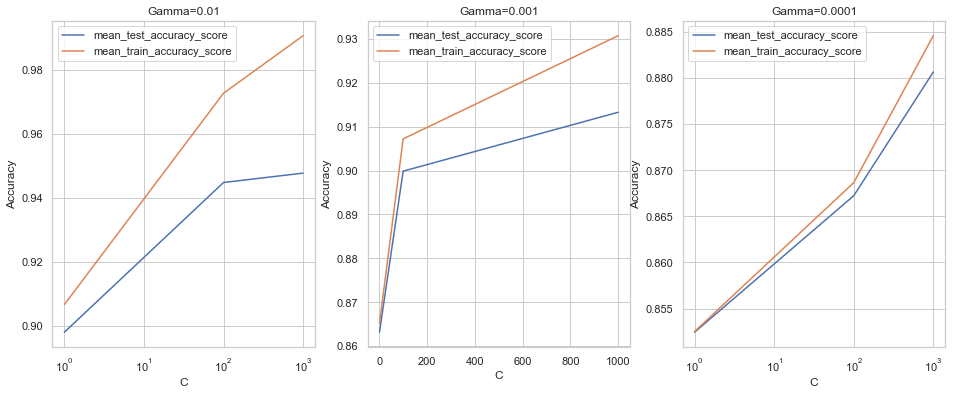

In [272]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_accuracy_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_accuracy_score"])


plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
# plt.ylim([0.80, 1])
plt.legend(['mean_test_accuracy_score' , 'mean_train_accuracy_score'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_accuracy_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_accuracy_score"])

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
# plt.ylim([0.80, 1])
plt.legend(['mean_test_accuracy_score' , 'mean_train_accuracy_score'], loc='upper left')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_accuracy_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_accuracy_score"])

plt.xlabel('C')
plt.ylabel('Accuracy' )
plt.title("Gamma=0.0001")
# plt.ylim([0.80, 1])
plt.legend(['mean_test_accuracy_score' , 'mean_train_accuracy_score'], loc='upper left')
plt.xscale('log')

#### Choosing C as 1000, gamma as 0.0001 since this combination does not  overfit the data. [Both train and test accuracies during cross validation is comparable] Also precision and recall values are acceptable from the table above
		
Accuracy - 0.880
Recall - 0.891
Precision - 0.872

In [273]:
#Create an SVM Model with the best hyperparameters

In [274]:
model = SVC(C = 1000 ,gamma = 0.0001 ,kernel="rbf")

In [275]:
model.fit(df_train_pca , y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [276]:
#Test data metrics

In [277]:
y_pred = model.predict(df_test_pca)
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8750320759558635
precision 0.4919053549190536
sensitivity/recall 0.8333333333333334


#### Test Accuracy - 0.87 , Test Recall - 0.833 . This model performance is good for  prediction since recall is high and accuracy is also good.

##### Random Forest Model

In [278]:
from sklearn.ensemble import RandomForestClassifier

In [279]:
# param_grid = {
#     'max_depth': [4,8,10],
#     'min_samples_leaf': range(100, 400, 200),
#     'min_samples_split': range(200,300,500)
#     'n_estimators': [100,500], 
#     'max_features': [5, 10]
# }

In [280]:
#Tuning Hyperparameters

In [281]:
parameters = {'max_depth': range(2, 20, 5)}
folds = KFold(n_splits = 4, shuffle = True, random_state = 4)
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [282]:
rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, 
                    cv=folds, 
                   scoring=scorers,
                   refit="recall_score",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                      

In [283]:
scores = rf.cv_results_

In [284]:
#Plots of variation of train and test metrics with max_depth of the tree

<Figure size 432x288 with 0 Axes>

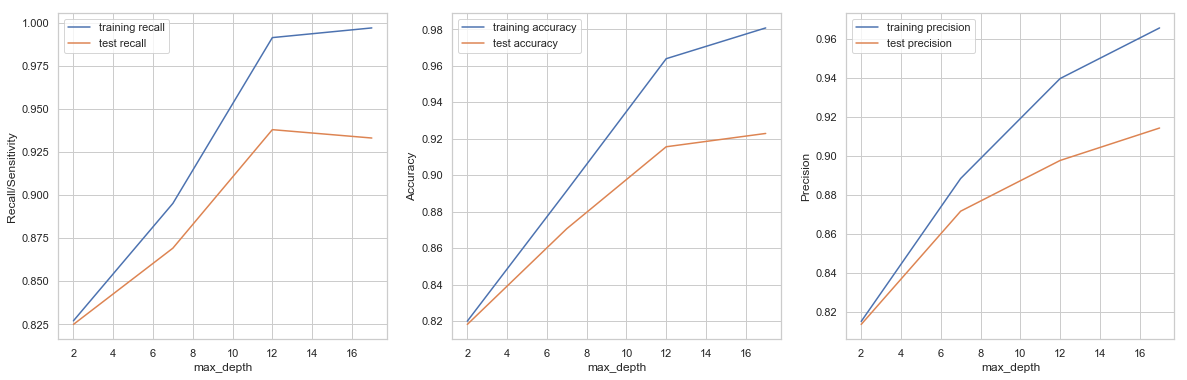

In [285]:
plt.figure()
plt.figure(figsize=(20,6))
plt.subplot(131)

#param_max_depth vs recall
plt.plot(scores["param_max_depth"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall/Sensitivity")
plt.legend()



#param_max_depth vs accuracy
plt.subplot(132)
plt.plot(scores["param_max_depth"], 
         scores["mean_train_accuracy_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_accuracy_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()



#param_max_depth vs accuracy
plt.subplot(133)
plt.plot(scores["param_max_depth"], 
         scores["mean_train_precision_score"], 
         label="training precision")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_precision_score"], 
         label="test precision")
plt.xlabel("max_depth")
plt.ylabel("Precision")
plt.legend()


#### Conclusion : max_depth of 12 for the tree gives  high sensitiviy, accuracy and precison for both train and test data during cross validation.Metrics decreases for test data set for depth of tree>12. Hence we choose 12 as the maximum depth of each tree

In [286]:
parameters = {'n_estimators': range(100, 1500, 400)}
folds = KFold(n_splits = 4, shuffle = True, random_state = 4)
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [287]:
rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, 
                    cv=folds, 
                   scoring=scorers,
                   refit="recall_score",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,...
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=No

In [288]:
scores = rf.cv_results_
pd.DataFrame(scores).head(n=100)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_precision_score,split1_test_precision_score,split2_test_precision_score,split3_test_precision_score,mean_test_precision_score,std_test_precision_score,rank_test_precision_score,split0_train_precision_score,split1_train_precision_score,split2_train_precision_score,split3_train_precision_score,mean_train_precision_score,std_train_precision_score,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,mean_train_recall_score,std_train_recall_score,split0_test_accuracy_score,split1_test_accuracy_score,split2_test_accuracy_score,split3_test_accuracy_score,mean_test_accuracy_score,std_test_accuracy_score,rank_test_accuracy_score,split0_train_accuracy_score,split1_train_accuracy_score,split2_train_accuracy_score,split3_train_accuracy_score,mean_train_accuracy_score,std_train_accuracy_score
0,10.644859,0.083973,0.331019,0.001414,100,{'n_estimators': 100},0.926442,0.929026,0.932660,0.924584,0.928178,0.003031,1,1.0,1.0,1.0,1.0,1.0,0.0,0.957278,0.954728,0.952358,0.954982,0.954836,0.001742,4,1.0,1.0,1.0,1.0,1.0,0.0,0.940354,0.941353,0.940854,0.939356,0.940479,0.000738,4,1.0,1.0,1.0,1.0,1.0,0.0
1,53.172291,0.359505,1.742350,0.053661,500,{'n_estimators': 500},0.926724,0.926592,0.930854,0.926781,0.927738,0.001800,3,1.0,1.0,1.0,1.0,1.0,0.0,0.961252,0.958753,0.958743,0.953971,0.958179,0.002636,2,1.0,1.0,1.0,1.0,1.0,0.0,0.942351,0.941852,0.942850,0.940105,0.941789,0.001035,2,1.0,1.0,1.0,1.0,1.0,0.0
2,95.605718,0.296922,3.411945,0.023532,900,{'n_estimators': 900},0.927028,0.926735,0.930755,0.925980,0.927624,0.001847,4,1.0,1.0,1.0,1.0,1.0,0.0,0.959265,0.960765,0.957269,0.955488,0.958197,0.001996,1,1.0,1.0,1.0,1.0,1.0,0.0,0.941602,0.942850,0.942101,0.940354,0.941727,0.000908,3,1.0,1.0,1.0,1.0,1.0,0.0
3,138.435668,0.496802,5.538317,0.022980,1300,{'n_estimators': 1300},0.927815,0.926699,0.931199,0.926925,0.928160,0.001804,2,1.0,1.0,1.0,1.0,1.0,0.0,0.957774,0.960262,0.957269,0.955994,0.957825,0.001549,3,1.0,1.0,1.0,1.0,1.0,0.0,0.941353,0.942600,0.942351,0.941103,0.941852,0.000636,1,1.0,1.0,1.0,1.0,1.0,0.0


In [289]:
###Plots of n_estimators vs metrics

<Figure size 432x288 with 0 Axes>

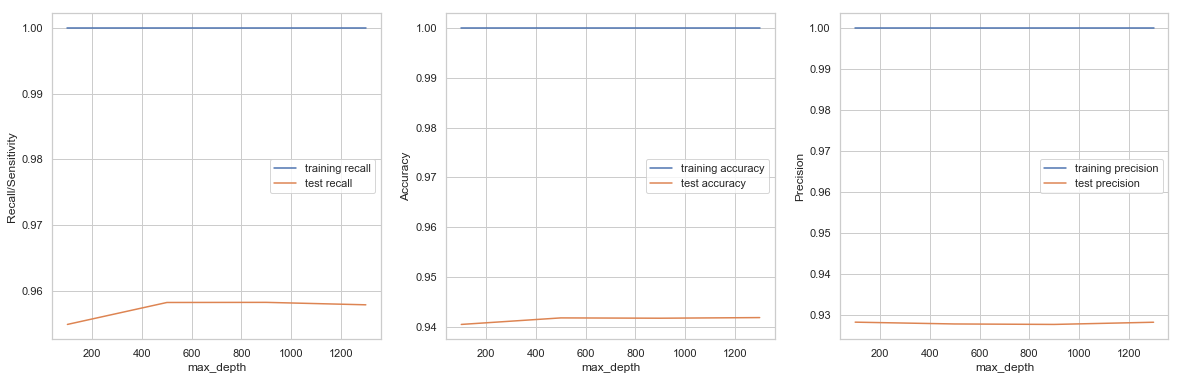

In [290]:
plt.figure()
plt.figure(figsize=(20,6))
plt.subplot(131)

#n_estimators vs recall
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall/Sensitivity")
plt.legend()



#n_estimators vs accuracy
plt.subplot(132)
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_accuracy_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_accuracy_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()



#n_estimators vs accuracy
plt.subplot(133)
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_precision_score"], 
         label="training precision")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_precision_score"], 
         label="test precision")
plt.xlabel("max_depth")
plt.ylabel("Precision")
plt.legend()

#### Conclusion : Accuracy, precision and recall does not change for both train and test with increase in number of trees.Hence we need to re-tune with lesser number of trees.


In [291]:
##Retuning with lesser number of tree intervals

In [292]:
parameters = {'n_estimators': range(10, 100, 10)}
folds = KFold(n_splits = 4, shuffle = True, random_state = 4)
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [293]:
rf = RandomForestClassifier(max_depth = 12)
rf = GridSearchCV(rf, parameters, 
                    cv=folds, 
                   scoring=scorers,
                   refit="recall_score",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_...
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_s

In [294]:
scores = rf.cv_results_

In [295]:
### Plots of n_estimators vs metrics

<Figure size 432x288 with 0 Axes>

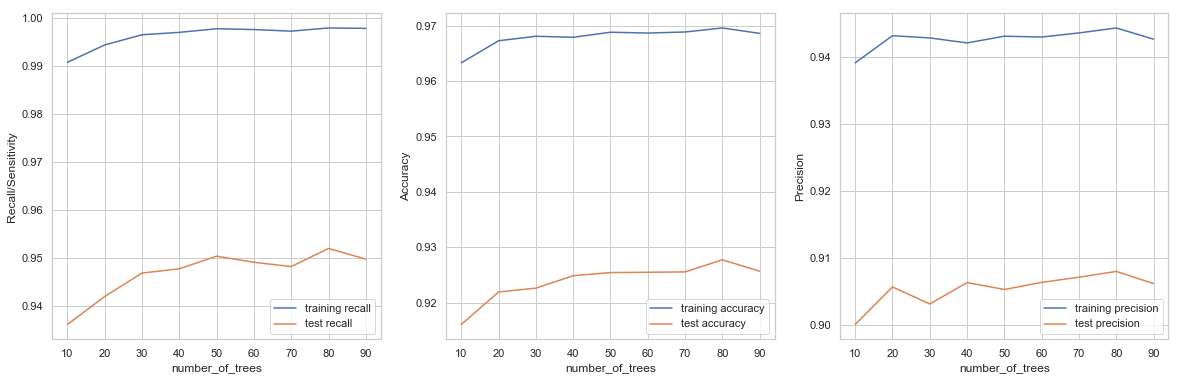

In [296]:
plt.figure()
plt.figure(figsize=(20,6))
plt.subplot(131)

#n_estimators vs recall
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("number_of_trees")
plt.ylabel("Recall/Sensitivity")
plt.legend()



#n_estimators vs accuracy
plt.subplot(132)
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_accuracy_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_accuracy_score"], 
         label="test accuracy")
plt.xlabel("number_of_trees")
plt.ylabel("Accuracy")
plt.legend()



#n_estimators vs accuracy
plt.subplot(133)
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_precision_score"], 
         label="training precision")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_precision_score"], 
         label="test precision")
plt.xlabel("number_of_trees")
plt.ylabel("Precision")
plt.legend()

#### Conclusion : Train and Test accuracy does not change after 30 number of trees,hence choosing 30 trees

In [297]:
#Create a model with the best parameters

In [298]:
RFC = RandomForestClassifier(max_depth=12,n_estimators=30)

In [299]:
RFC.fit(df_train_pca , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [300]:
y_train_pred = RFC.predict(df_train_pca)
print(confusion_matrix(y_train ,y_train_pred))

[[7489  525]
 [  36 7978]]


In [301]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      8014
         1.0       0.94      1.00      0.97      8014

    accuracy                           0.96     16028
   macro avg       0.97      0.96      0.96     16028
weighted avg       0.97      0.96      0.96     16028



In [302]:
### Test metrics

In [303]:
y_test_pred = RFC.predict(df_test_pca)

In [304]:
print(confusion_matrix(y_test, y_test_pred))

[[3126  297]
 [ 129  345]]


In [305]:
metrics.accuracy_score(y_test, y_test_pred)

0.8906851424172441

In [306]:
metrics.recall_score(y_test, y_test_pred)

0.7278481012658228

In [307]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      3423
         1.0       0.54      0.73      0.62       474

    accuracy                           0.89      3897
   macro avg       0.75      0.82      0.78      3897
weighted avg       0.91      0.89      0.90      3897



In [308]:
### RandomForest model's performance is much lower than SVM .

#### Results :

1.SVM Model's performance is the best for Recall metrics .since we are interested in recall/True Positive rate
Use SVM Model for the prediction


2.Most important features for churn are from month 8 -Action phase


LogOdds =  0.1211 *offnet_mou_8 - 0.5160*std_og_t2t_mou_8 - 0.4579*std_og_t2m_mou_8 - 2.4148*total_ic_mou_8 -0.4242spl_ic_mou_8 -0.6345*data_volume_8 - 0.9293*AP_last_recharge_amt + 0.1211*offnet_mou_8


std_og_t2t_mou_8', 'std_og_t2m_mou_8','total_ic_mou_8','spl_ic_mou_8','data_volume_8','AP_last_recharge_amt' have negative co -efficients which indicate that if these features are high then the possibility of churn is less.Recommendation is to monitor these features and take appropriate actions if the values of these features are low.



